# Introduction :

An artificial neural network learning algorithm, or neural network, or just neural net.
It is a computational learning system that uses a network of functions to understand and translate a data input of one form into a desired output, usually in another form. The concept of the artificial neural network was inspired by human biology and the way neurons of the human brain function together to understand inputs from human senses. 

Neural networks are just one of many tools and approaches used in machine learning algorithms. The neural network itself may be used as a piece in many different machine learning algorithms to process complex data inputs into a space that computers can understand. 

Neural networks are being applied to many real-life problems today, including speech and image recognition, spam email filtering, finance, and medical diagnosis, to name a few. 


# Problem Statement:
predicting turbine energy yield (TEY) using ambient variables as features.




# About the data:
he dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

So, before making the models it is require to check the missing values, outliere & of course have to do the EDA, Feature engineering,scaling(if require), hyperparameter tuning etc. In the end will have to evaluate the model by checking its accurcy & errors also will do the residual analysis to verify the features coefficiency with target.

# Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
sns.set_style('darkgrid')
from imblearn.pipeline import Pipeline

import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, \
                                    train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')
from keras.optimizers import Adam
from kerastuner.tuners import RandomSearch
from tensorflow.keras import layers
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.constraints import maxnorm
from keras.wrappers.scikit_learn import KerasRegressor, KerasClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Load the Data

In [2]:
data=pd.read_csv('C:/Users/VivekG/Desktop/My Files- Vivek/gas_turbines.csv')

In [3]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


# EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [5]:
data.shape

(15039, 11)

In [6]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [8]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [9]:

data[data.duplicated()].shape

(0, 11)

In [10]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [11]:
data.corr()["TEY"].sort_values(ascending=False)

TEY     1.000000
CDP     0.988473
GTEP    0.977042
TIT     0.891587
AFDP    0.717995
AP      0.146939
NOX    -0.102631
AH     -0.110272
AT     -0.207495
CO     -0.541751
TAT    -0.720356
Name: TEY, dtype: float64

In [12]:
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features                                      # knowing the numerical colums,may require ahead.

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [13]:
data.skew(axis = 0, skipna = True) # skewness of each variable.(all variables are numeric)

AT     -0.030710
AP      0.107601
AH     -0.681224
AFDP    0.315150
GTEP    0.370987
TIT    -1.133744
TAT    -1.485524
TEY     0.145963
CDP     0.263042
CO      6.534577
NOX     1.126605
dtype: float64

Observation :The features AH, CO, TIT and TATa exhibit the highest skew coefficients. Moreover, the distribution of CO,TIT,TAT seem to contain many outliers.

# Visualization

<AxesSubplot:ylabel='Frequency'>

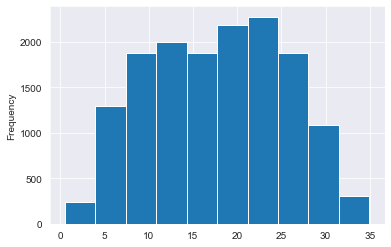

In [14]:
data['AT'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

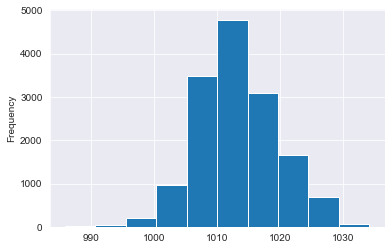

In [15]:
data['AP'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

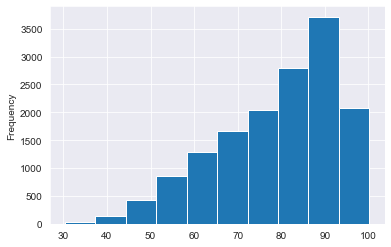

In [16]:
data['AH'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

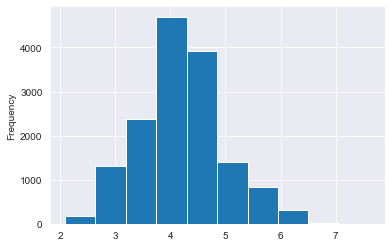

In [17]:
data['AFDP'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

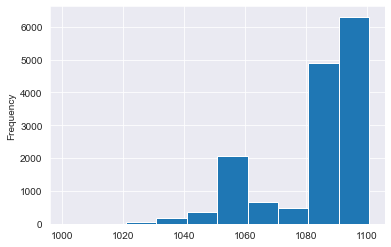

In [18]:
data['TIT'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

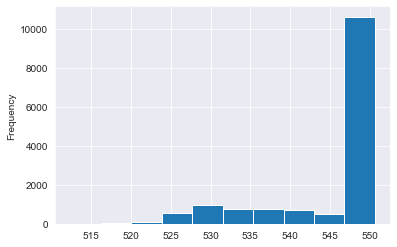

In [19]:
data['TAT'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

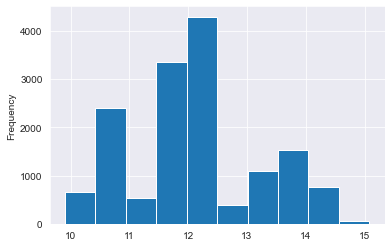

In [20]:
data['CDP'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

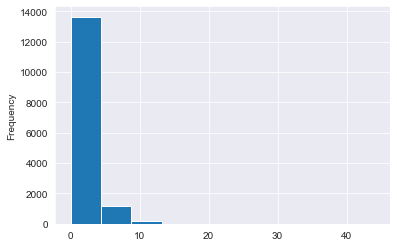

In [21]:
data['CO'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

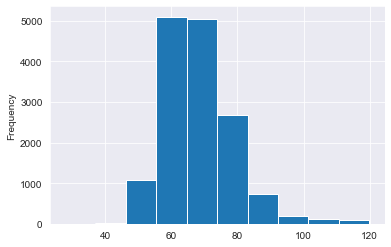

In [22]:
data['NOX'].plot(kind='hist')

<AxesSubplot:>

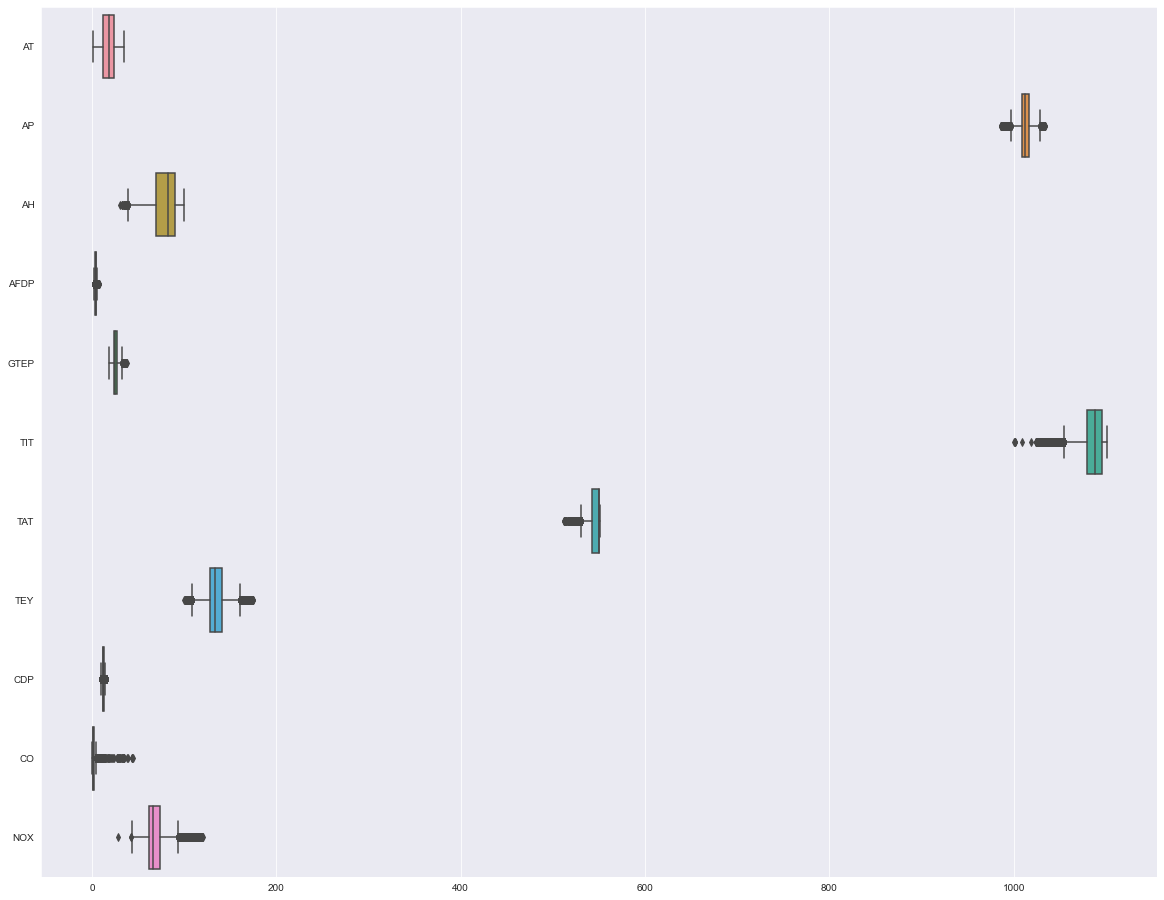

In [23]:
plt.figure(figsize=(20,16))    # Find the outliers
sns.boxplot(data=data[numerical_features], orient="h")

Text(0.5, 1.0, 'Histogram of the Target variable')

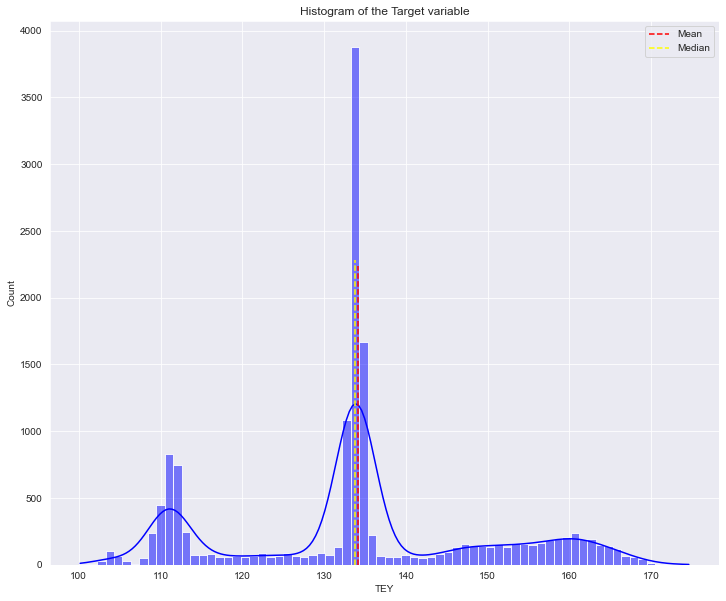

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
sns.histplot(data=data,x="TEY",color="blue",kde=True)
plt.axvline(x=data["TEY"].mean(),ymax=0.55,color="red",linestyle='--',label="Mean")
plt.axvline(x=data["TEY"].median(),ymax=0.56,color="yellow",linestyle='--',label="Median")
plt.legend()
plt.title("Histogram of the Target variable")

Text(0.5, 1.0, 'Cumulative of the Target variable')

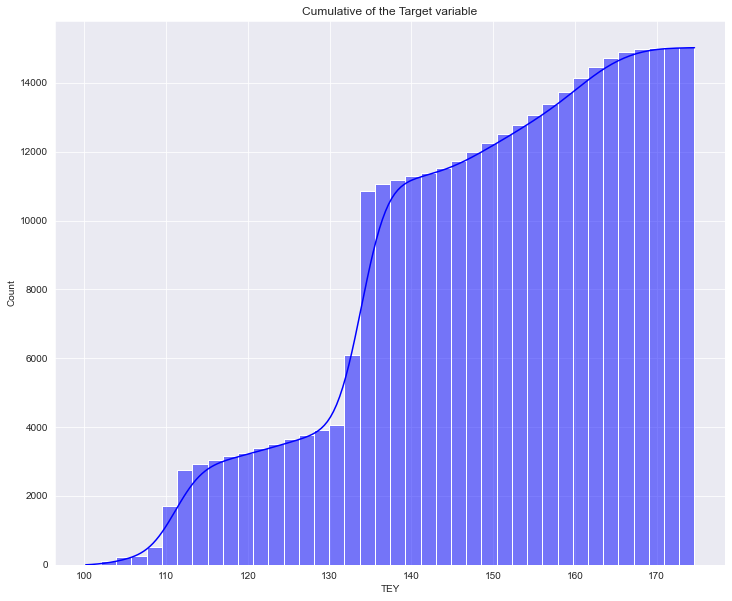

In [25]:
plt.figure(figsize = (12,10))
sns.histplot(data["TEY"],kde=True,bins=40,color="blue",cumulative=True)
plt.title("Cumulative of the Target variable")

Features are mostly not on a same scale(we've seen in histogram & Boxplots),Lets check their collinarity with Target variable first through scatter plot.

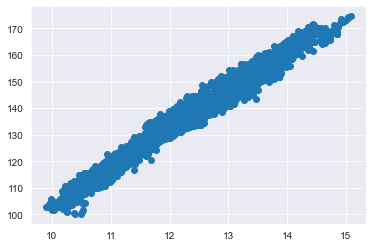

In [26]:
plt.scatter(x="CDP",y="TEY",data=data) #  CDP vs TEY linerly co-related

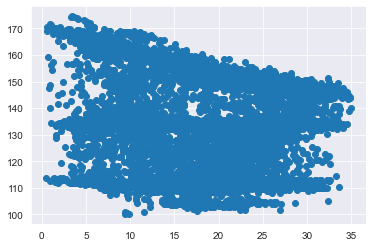

In [27]:
plt.scatter(x="AT",y="TEY",data=data) # AT vs TEY

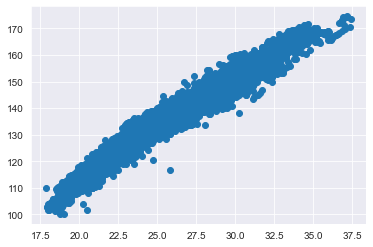

In [28]:
plt.scatter(x="GTEP",y="TEY",data=data) # GTEP vs TEY linerly co-related

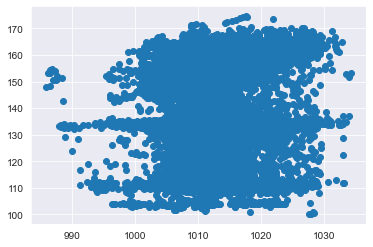

In [29]:
plt.scatter(x="AP",y="TEY",data=data) # AP vs TEY

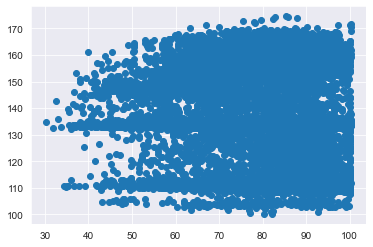

In [30]:
plt.scatter(x="AH",y="TEY",data=data) # AH vs TEY

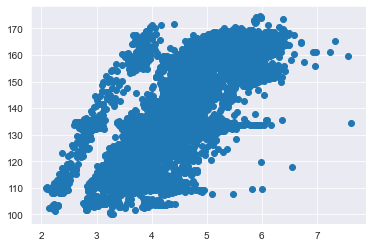

In [31]:
plt.scatter(x="AFDP",y="TEY",data=data)  # AFDP vs TEY

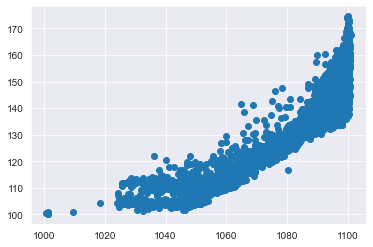

In [32]:
plt.scatter(x="TIT",y="TEY",data=data)    # TIT vs TEY

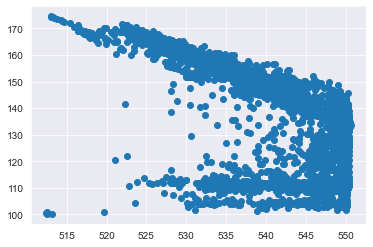

In [33]:
plt.scatter(x="TAT",y="TEY",data=data)   # TAT vs TEY

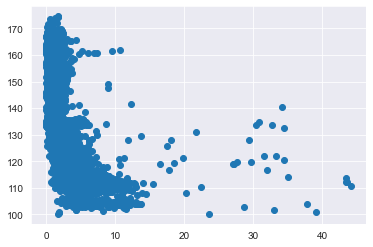

In [34]:
plt.scatter(x="CO",y="TEY",data=data)    # CO vs TEY

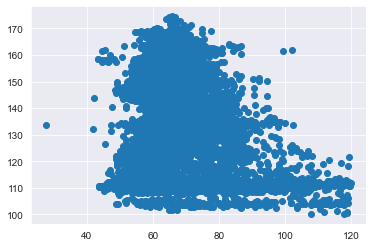

In [35]:
plt.scatter(x="NOX",y="TEY",data=data)    # NOX vs TEY

# Correlation

In [36]:
corr=data.corr()
corr

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


<AxesSubplot:>

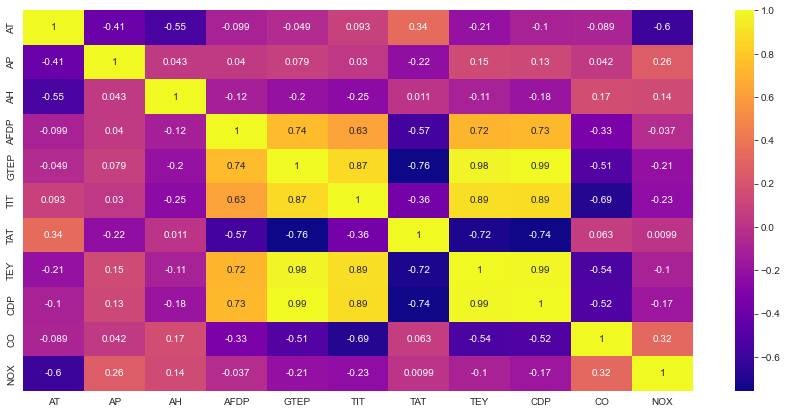

In [37]:
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True,cmap='plasma')     # Heat map correlation

<AxesSubplot:>

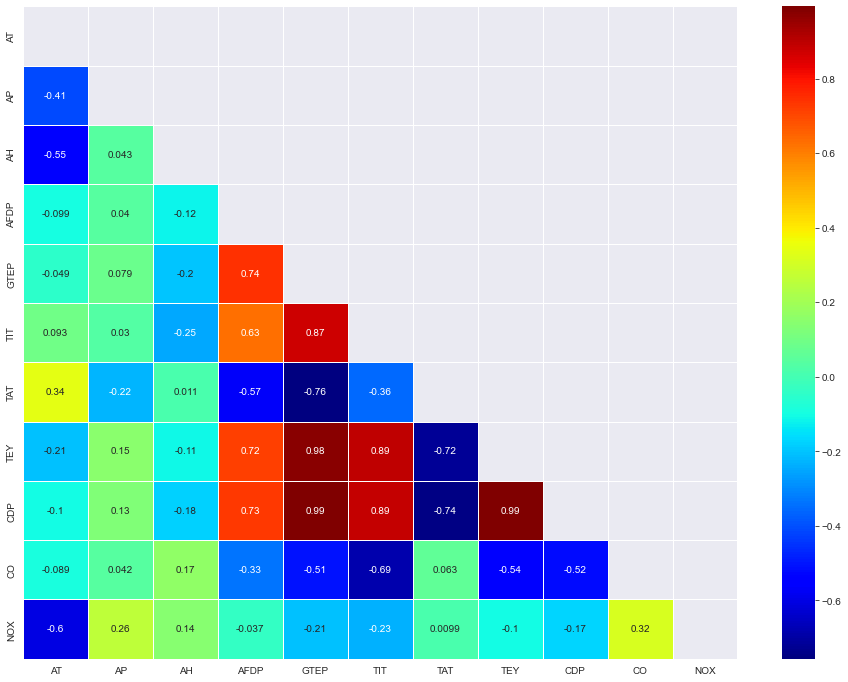

In [38]:
# Heatmap - Correlation matrix
plt.figure(figsize=(16,12))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data=data.corr(), cmap="jet", annot=True,linewidths=1, linecolor='white',mask=mask)

In [39]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        
        # Interquartile rrange (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(data[numerical_features])))) 


The dataset contains 1543 observations with more than 2 outliers


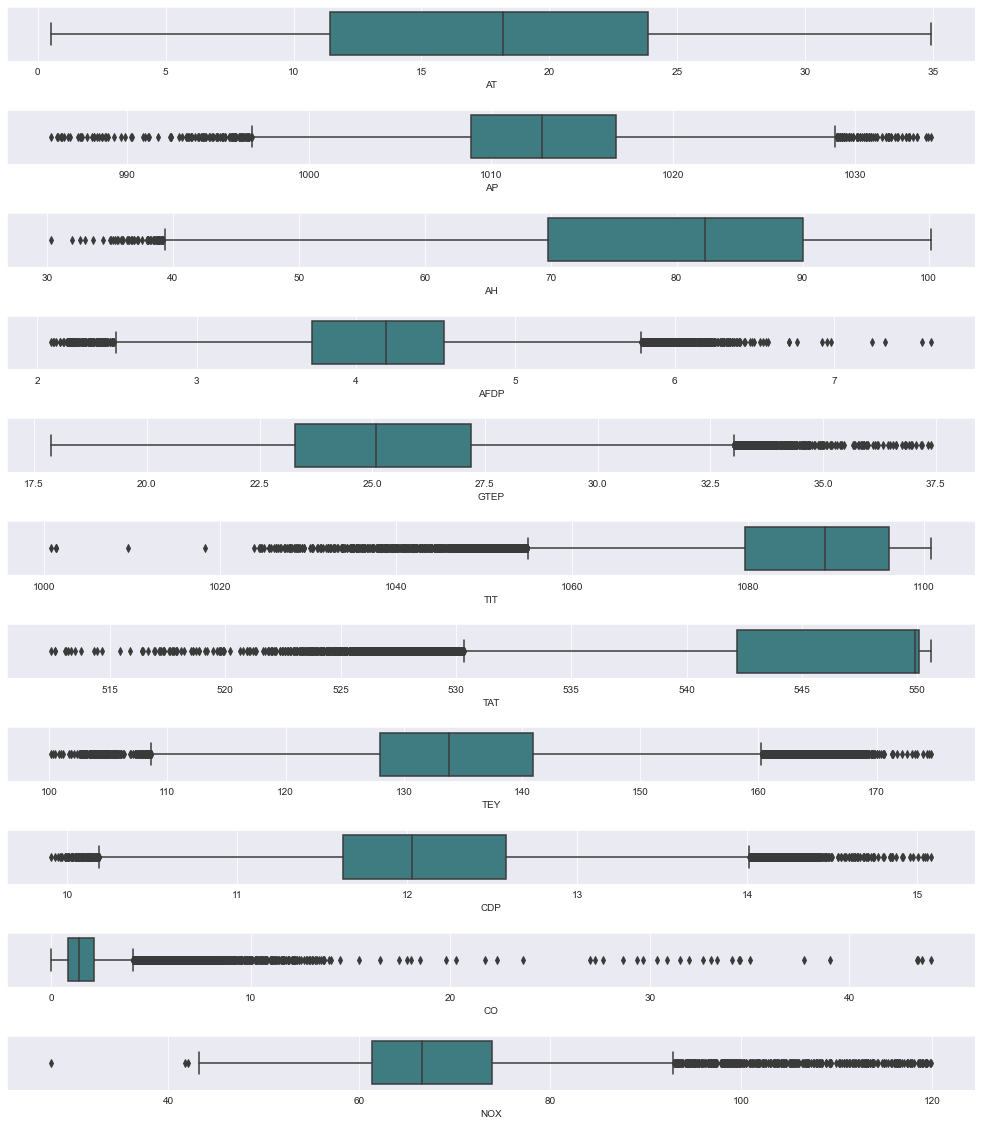

In [40]:
viz=data.copy() 
fig, axes=plt.subplots(11,1,figsize=(14,16),sharex=False,sharey=False)
sns.boxplot(x='AT',data=data,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=data,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=data,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=data,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=data,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=data,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=data,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=data,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=data,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=data,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=data,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

# Assigning the dataset into x & y variable

In [41]:
x = data.drop('TEY', axis=1) # All features
y = data[["TEY"]]           # Target

In [42]:
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311


In [43]:
y

,TEY
0,114.70
1,114.72
2,114.71
3,114.72
4,114.72
...,...
15034,111.61
15035,111.78
15036,110.19
15037,110.74


# Feature Importance(selection)

In [44]:
from numpy import set_printoptions

In [45]:
# feature extraction
test = SelectKBest(score_func=mutual_info_regression, k='all')
fit = test.fit(x, y)

In [46]:
# summarize scores
scores = fit.scores_

features = fit.transform(x)

In [47]:
score_data = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_data.sort_values(by="Score", ascending=False, inplace=True)
score_data

,Score,Feature
7,1.711309,CDP
4,1.600602,GTEP
5,1.322194,TIT
6,0.895578,TAT
3,0.660405,AFDP
8,0.512883,CO
0,0.412731,AT
9,0.300137,NOX
1,0.135762,AP
2,0.097453,AH


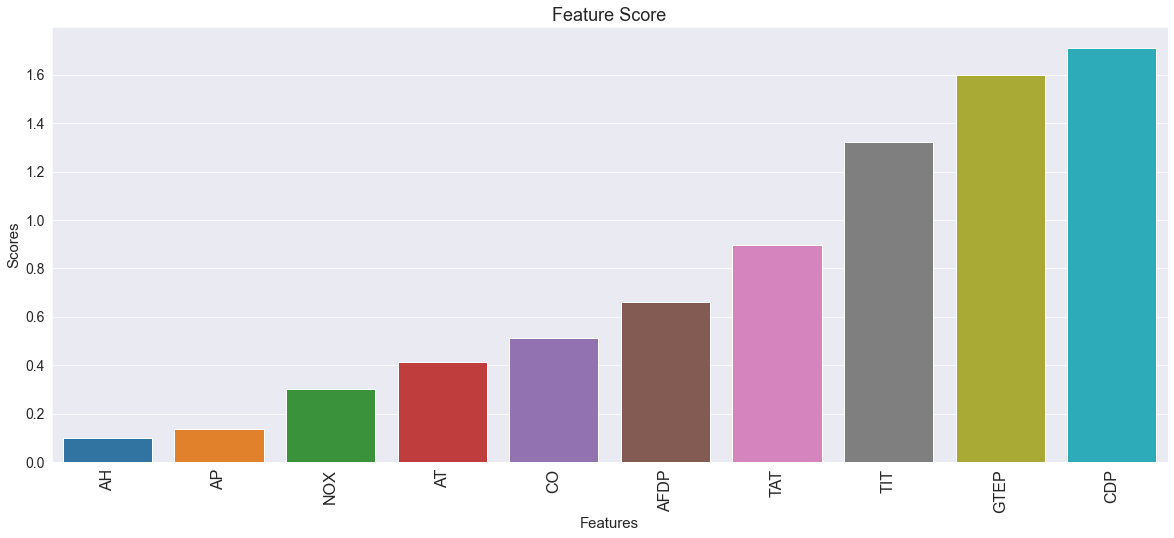

In [48]:
plt.figure(figsize=(20,8))         # Visualize the Feature Score

sns.barplot(x='Feature',
            y="Score", 
            data=score_data, 
            order=score_data.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score", size=18)
plt.show()

In [49]:
score_data.sort_values('Score',ascending=False)

,Score,Feature
7,1.711309,CDP
4,1.600602,GTEP
5,1.322194,TIT
6,0.895578,TAT
3,0.660405,AFDP
8,0.512883,CO
0,0.412731,AT
9,0.300137,NOX
1,0.135762,AP
2,0.097453,AH


In [50]:
model_data = data[['CDP', 'GTEP','TIT', 'TAT', 'AFDP', 'CO', 'AT',"TEY"]]
model_data.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72


# Data Pre-Processing

# Feature Engineering

In [51]:
continuous_feature=[feature for feature in model_data.columns if model_data[feature].dtype!='O']
print('Continuous Feature Count {}'.format(len(continuous_feature)))

Continuous Feature Count 8


In [52]:
data_standard_scaled = model_data.copy()
features = data_standard_scaled[continuous_feature]

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_standard_scaled[continuous_feature] = scaler.fit_transform(features.values)
data_standard_scaled.head()

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,-1.357331,-1.379101,-1.488376,0.585240,-0.921232,0.532012,-1.439778,-1.231172
1,-1.363676,-1.363528,-1.482325,0.585240,-0.921495,0.568733,-1.449601,-1.229909
2,-1.360957,-1.351309,-1.476275,0.568715,-0.944385,0.552938,-1.434721,-1.230541
3,-1.356424,-1.348194,-1.464173,0.583969,-0.946884,0.548933,-1.413702,-1.229909
4,-1.350985,-1.354663,-1.458123,0.582698,-0.924389,0.574179,-1.368693,-1.229909


# Mean and standard deviation of scaled data

In [54]:
print('Mean' '\n',np.round(data_standard_scaled.mean(),1),'\n' 'Standard Devaition','\n',np.round(data_standard_scaled.std()),1)

Mean
 CDP     0.0
GTEP    0.0
TIT    -0.0
TAT     0.0
AFDP    0.0
CO      0.0
AT     -0.0
TEY     0.0
dtype: float64 
Standard Devaition 
 CDP     1.0
GTEP    1.0
TIT     1.0
TAT     1.0
AFDP    1.0
CO      1.0
AT      1.0
TEY     1.0
dtype: float64 1


# Split the Variant dataset into Train -Test.

In [55]:
x = data_standard_scaled.drop('TEY',axis=1)
y = data_standard_scaled[['TEY']]

In [56]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

# Hyperparameter Tuning
 Hyperparameter Tuning: Optimal Learning rate ,Number of Layers and Neurons

In [57]:
def build_model(hp):
    model =Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=100,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='mean_absolute_error',
        metrics=['mean_absolute_error'])
    return model

In [58]:
tuner = RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=5,  executions_per_trial=3,directory='project',project_name='Gas Turbine')

INFO:tensorflow:Reloading Oracle from existing project project\Gas Turbine\oracle.json
INFO:tensorflow:Reloading Tuner from project\Gas Turbine\tuner0.json


In [59]:
tuner.search_space_summary()

Search space summary
Default search space size: 19
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [60]:
tuner.search(x_train, y_train,epochs=100,validation_data=(x_test, y_test))

INFO:tensorflow:Oracle triggered exit


In [61]:
tuner.results_summary()

Results summary
Results in project\Gas Turbine
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 17
units_0: 64
units_1: 64
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 64
units_5: 96
units_6: 96
units_7: 96
units_8: 64
units_9: 64
units_10: 64
units_11: 64
units_12: 32
units_13: 64
units_14: 64
units_15: 96
units_16: 64
Score: 0.024215875814358395
Trial summary
Hyperparameters:
num_layers: 7
units_0: 96
units_1: 32
learning_rate: 0.0001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
units_6: 32
Score: 0.02449424999455611
Trial summary
Hyperparameters:
num_layers: 16
units_0: 64
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 96
units_4: 64
units_5: 64
units_6: 64
units_7: 64
units_8: 96
units_9: 32
units_10: 96
units_11: 64
units_12: 64
units_13: 96
units_14: 64
units_15: 32
units_16: 32
Score: 0.024775472159187
Trial summary
Hyperparameters:
num_layers: 17
units_0: 32
units_1: 64
learning_rate: 0.0001
units_2: 96
units_3: 32
units_4: 96
units_5: 96
un

# Hyperparameter Tuning:
Optimal Batch_size, Number of Epochs

In [62]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(32,input_dim=7,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(96,activation="relu"))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(64,activation="relu"))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.001)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [63]:
model1 =KerasRegressor(build_fn=create_model,verbose=0)
batch_size=[10,20,40,50]
epochs=[10,50,100,200]
param_grid=dict(batch_size=batch_size,epochs=epochs)
grid = GridSearchCV(estimator=model1,param_grid=param_grid,cv=KFold(),verbose=10)

In [64]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.080 total time=   4.3s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.035 total time=   4.2s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.056 total time=   4.3s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.042 total time=   4.1s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ...batch_size=10, epochs=10;, score=-0.048 total time=   4.2s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ...batch_size=10, epochs=50;,

[CV 1/5; 11/16] END .batch_size=40, epochs=100;, score=-0.040 total time=  10.7s
[CV 2/5; 11/16] START batch_size=40, epochs=100.................................
[CV 2/5; 11/16] END .batch_size=40, epochs=100;, score=-0.041 total time=  11.6s
[CV 3/5; 11/16] START batch_size=40, epochs=100.................................
[CV 3/5; 11/16] END .batch_size=40, epochs=100;, score=-0.029 total time=  10.9s
[CV 4/5; 11/16] START batch_size=40, epochs=100.................................
[CV 4/5; 11/16] END .batch_size=40, epochs=100;, score=-0.028 total time=  10.7s
[CV 5/5; 11/16] START batch_size=40, epochs=100.................................
[CV 5/5; 11/16] END .batch_size=40, epochs=100;, score=-0.027 total time=  10.5s
[CV 1/5; 12/16] START batch_size=40, epochs=200.................................
[CV 1/5; 12/16] END .batch_size=40, epochs=200;, score=-0.029 total time=  22.4s
[CV 2/5; 12/16] START batch_size=40, epochs=200.................................
[CV 2/5; 12/16] END .batch_s

In [65]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.02866109237074852, using {'batch_size': 40, 'epochs': 200}
-0.05224805995821953,0.015546208971706764 with {'batch_size': 10, 'epochs': 10}
-0.03585148677229881,0.003754369379243687 with {'batch_size': 10, 'epochs': 50}
-0.03232522383332252,0.005794000413424672 with {'batch_size': 10, 'epochs': 100}
-0.03660063222050667,0.007307943505439092 with {'batch_size': 10, 'epochs': 200}
-0.03998197726905346,0.008489289511689438 with {'batch_size': 20, 'epochs': 10}
-0.03448891006410122,0.0024480097831510402 with {'batch_size': 20, 'epochs': 50}
-0.03181973472237587,0.004626483852456871 with {'batch_size': 20, 'epochs': 100}
-0.03162822313606739,0.004201925674545686 with {'batch_size': 20, 'epochs': 200}
-0.03539412394165993,0.003099212934395534 with {'batch_size': 40, 'epochs': 10}
-0.031984541192650796,0.0022462202438108397 with {'batch_size': 40, 'epochs': 50}
-0.033223414421081544,0.0061896182520120475 with {'batch_size': 40, 'epochs': 100}
-0.02866109237074852,0.0016162995233162767 

# Hyperparameter Tuning: 
Optimal Droupout rate

In [66]:
def create_model(dropout_rate):
    model2 = Sequential()
    model2.add(Dense(32,input_dim=7,activation='relu'))
    model2.add(Dense(64,activation='relu'))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(96,activation="relu"))
    model2.add(Dense(32,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(64,activation="relu"))
    model2.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model2.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model2

In [67]:
model2=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
dropout_rate=[0.0,0.1,0.2,0.3,0.4,0.5]
param_grid=dict(dropout_rate=dropout_rate)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=KFold(),verbose=10)

In [68]:
grid_result2 = grid2.fit(x_test,y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ............dropout_rate=0.0;, score=-0.029 total time=  20.9s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ............dropout_rate=0.0;, score=-0.029 total time=  20.6s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ............dropout_rate=0.0;, score=-0.031 total time=  22.1s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ............dropout_rate=0.0;, score=-0.029 total time=  21.3s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ............dropout_rate=0.0;, score=-0.025 total time=  20.4s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ............dropout_rate=0.1;, 

In [69]:
print('Best {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_["mean_test_score"]
stds = grid_result2.cv_results_["std_test_score"]
params = grid_result2.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.028773216530680656, using {'dropout_rate': 0.0}
-0.028773216530680656,0.0019410401531494118 with {'dropout_rate': 0.0}
-0.03144183531403542,0.0053453333774556785 with {'dropout_rate': 0.1}
-0.030797438323497774,0.00700966695384807 with {'dropout_rate': 0.2}
-0.03225676007568836,0.005006151088716248 with {'dropout_rate': 0.3}
-0.03167895153164864,0.0026271180783469924 with {'dropout_rate': 0.4}
-0.03130651861429214,0.0028076570604663727 with {'dropout_rate': 0.5}


# Hyperparameter Tuning: 
Optimal Activation Function and Kernel Initializer

In [70]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(32,input_dim=7,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(96,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(64,activation="relu"))
    model3.add(Dropout(0.3))
    model3.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model3.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model3

In [71]:
model3=KerasRegressor(build_fn=create_model,batch_size=40,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid3 = GridSearchCV(estimator=model3,param_grid=param_grid,cv=KFold(),verbose=10)

In [72]:
grid_result3 = grid3.fit(x_test,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START activation_function=softmax, init=normal....................
[CV 1/5; 1/9] END activation_function=softmax, init=normal;, score=-0.783 total time=  38.4s
[CV 2/5; 1/9] START activation_function=softmax, init=normal....................
[CV 2/5; 1/9] END activation_function=softmax, init=normal;, score=-0.724 total time=  37.8s
[CV 3/5; 1/9] START activation_function=softmax, init=normal....................
[CV 3/5; 1/9] END activation_function=softmax, init=normal;, score=-0.718 total time=  39.0s
[CV 4/5; 1/9] START activation_function=softmax, init=normal....................
[CV 4/5; 1/9] END activation_function=softmax, init=normal;, score=-0.679 total time=  38.0s
[CV 5/5; 1/9] START activation_function=softmax, init=normal....................
[CV 5/5; 1/9] END activation_function=softmax, init=normal;, score=-0.780 total time=  40.0s
[CV 1/5; 2/9] START activation_function=softmax, init=uniform.........

In [79]:
print('Best {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means = grid_result3.cv_results_["mean_test_score"]
stds = grid_result3.cv_results_["std_test_score"]
params = grid_result3.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.5156297415494919, using {'activation_function': 'relu', 'init': 'zero'}
-0.736888325214386,0.03953167294154951 with {'activation_function': 'softmax', 'init': 'normal'}
-0.7885318517684936,0.07341225525083392 with {'activation_function': 'softmax', 'init': 'uniform'}
-0.6940292119979858,0.08708033183662701 with {'activation_function': 'softmax', 'init': 'zero'}
-0.7585910558700562,0.020363426349101262 with {'activation_function': 'tanh', 'init': 'normal'}
-0.715707790851593,0.07842000478347273 with {'activation_function': 'tanh', 'init': 'uniform'}
-0.6990578800439835,0.2633086949327088 with {'activation_function': 'tanh', 'init': 'zero'}
-0.7735232234001159,0.10112187897374643 with {'activation_function': 'relu', 'init': 'normal'}
-0.6554908931255341,0.2171109844972484 with {'activation_function': 'relu', 'init': 'uniform'}
-0.5156297415494919,0.24118542487830388 with {'activation_function': 'relu', 'init': 'zero'}


# Built the Model

In [80]:
#Standardizing only predictor variable - after train test split
model_data

,CDP,GTEP,TIT,TAT,AFDP,CO,AT,TEY
0,10.605,19.663,1059.2,550.00,3.5000,3.1547,6.8594,114.70
1,10.598,19.728,1059.3,550.00,3.4998,3.2363,6.7850,114.72
2,10.601,19.779,1059.4,549.87,3.4824,3.2012,6.8977,114.71
3,10.606,19.792,1059.6,549.99,3.4805,3.1923,7.0569,114.72
4,10.612,19.765,1059.7,549.98,3.4976,3.2484,7.3978,114.72
...,...,...,...,...,...,...,...,...
15034,10.400,19.164,1049.7,546.21,3.5421,4.5186,9.0301,111.61
15035,10.433,19.414,1046.3,543.22,3.5059,4.8470,7.8879,111.78
15036,10.483,19.530,1037.7,537.32,3.4770,7.9632,7.2647,110.19
15037,10.533,19.377,1043.2,541.24,3.4486,6.2494,7.0060,110.74


In [75]:
#assigning predictor variables to x and response variable to y
x = model_data.drop('TEY', axis=1)
y = model_data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=42)

scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_scaled = scaler_train.fit_transform(x_train) # scaling train data -- predictor
x_test_scaled  = scaler_test.fit_transform(x_test) # scaling test data -- predictor

print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)


(12031, 7)
(3008, 7)
(12031, 1)
(3008, 1)


In [88]:
# since we have continuous ouput, AF is not required in the o/p layer
model = Sequential()
model.add( Dense( units = 50 , activation = 'relu' , kernel_initializer = 'normal', input_dim = 7)) # input layer
model.add( Dense( units = 20 , activation = 'tanh' , kernel_initializer = 'normal' )) # hidden layer
model.add( Dense( units = 1  , kernel_initializer = 'normal' )) # o/p layer

model.compile(optimizer= "adam", loss="mse", metrics= ["mae", "mse"])
model.fit(x_train_scaled, y_train , batch_size=50, validation_split=0.3, epochs=100,  verbose=1)

Epoch 1/100
169/169 [==============================] - 1s 2ms/step - loss: 17609.3652 - mae: 131.7357 - mse: 17609.3652 - val_loss: 16748.4746 - val_mae: 128.4539 - val_mse: 16748.4746
Epoch 2/100
169/169 [==============================] - 0s 1ms/step - loss: 16251.6055 - mae: 126.4838 - mse: 16251.6055 - val_loss: 15695.3828 - val_mae: 124.2873 - val_mse: 15695.3828
Epoch 3/100
169/169 [==============================] - 0s 1ms/step - loss: 15277.2109 - mae: 122.5723 - mse: 15277.2109 - val_loss: 14778.0723 - val_mae: 120.5407 - val_mse: 14778.0723
Epoch 4/100
169/169 [==============================] - 0s 1ms/step - loss: 14393.7070 - mae: 118.9148 - mse: 14393.7070 - val_loss: 13926.6494 - val_mae: 116.9558 - val_mse: 13926.6494
Epoch 5/100
169/169 [==============================] - 0s 1ms/step - loss: 13565.9600 - mae: 115.3840 - mse: 13565.9600 - val_loss: 13123.5332 - val_mae: 113.4705 - val_mse: 13123.5332
Epoch 6/100
169/169 [==============================] - 0s 1ms/step - loss: 

169/169 [==============================] - 0s 1ms/step - loss: 335.1328 - mae: 15.1500 - mse: 335.1328 - val_loss: 316.5081 - val_mae: 14.7235 - val_mse: 316.5081
Epoch 47/100
169/169 [==============================] - 0s 1ms/step - loss: 312.9075 - mae: 14.4779 - mse: 312.9075 - val_loss: 297.4559 - val_mae: 14.0806 - val_mse: 297.4559
Epoch 48/100
169/169 [==============================] - 0s 1ms/step - loss: 295.5046 - mae: 13.8658 - mse: 295.5046 - val_loss: 282.5968 - val_mae: 13.4959 - val_mse: 282.5968
Epoch 49/100
169/169 [==============================] - 0s 1ms/step - loss: 282.2442 - mae: 13.3181 - mse: 282.2442 - val_loss: 271.3540 - val_mae: 12.9716 - val_mse: 271.3540
Epoch 50/100
169/169 [==============================] - 0s 1ms/step - loss: 272.4076 - mae: 12.8487 - mse: 272.4076 - val_loss: 263.4291 - val_mae: 12.5274 - val_mse: 263.4291
Epoch 51/100
169/169 [==============================] - 0s 1ms/step - loss: 265.3129 - mae: 12.4335 - mse: 265.3129 - val_loss: 257.7

Epoch 94/100
169/169 [==============================] - 0s 1ms/step - loss: 0.8102 - mae: 0.5908 - mse: 0.8102 - val_loss: 0.7340 - val_mae: 0.5595 - val_mse: 0.7340
Epoch 95/100
169/169 [==============================] - 0s 1ms/step - loss: 0.7461 - mae: 0.5654 - mse: 0.7461 - val_loss: 0.7535 - val_mae: 0.5853 - val_mse: 0.7535
Epoch 96/100
169/169 [==============================] - 0s 1ms/step - loss: 0.7238 - mae: 0.5686 - mse: 0.7238 - val_loss: 0.6496 - val_mae: 0.5291 - val_mse: 0.6496
Epoch 97/100
169/169 [==============================] - 0s 1ms/step - loss: 0.6931 - mae: 0.5585 - mse: 0.6931 - val_loss: 0.6391 - val_mae: 0.5310 - val_mse: 0.6391
Epoch 98/100
169/169 [==============================] - 0s 1ms/step - loss: 0.6499 - mae: 0.5405 - mse: 0.6499 - val_loss: 0.6393 - val_mae: 0.5536 - val_mse: 0.6393
Epoch 99/100
169/169 [==============================] - 0s 1ms/step - loss: 0.6346 - mae: 0.5437 - mse: 0.6346 - val_loss: 0.6195 - val_mae: 0.5300 - val_mse: 0.6195
Epoc

In [83]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
        
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
     
    bestParamTable = pd.DataFrame()
    
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Making ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=20, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(optimizer ='adam', loss = 'mean_squared_error')
            
            # Fit the ANN to the Training set
            model.fit(x_train_scaled, y_train , batch_size=batch_trial, epochs=epochs_trial,  verbose=0)
                        
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(x_test_scaled))/y_test))  
                        
            bestParamTable=bestParamTable.append(pd.DataFrame(data=[[batch_trial, epochs_trial, 100-MAPE]],
                                                        columns=['batchsize','epochs','Accuracy'] ))
            
           
    return bestParamTable

# Calling the function
finalParamTable = toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)
finalParamTable

94/94 [==============================] - 0s 677us/step


,batchsize,epochs,Accuracy
0,5,5,TEY 97.654432 dtype: float64
0,5,10,TEY 99.606322 dtype: float64
0,5,50,TEY 99.586229 dtype: float64
0,5,100,TEY 99.685385 dtype: float64
0,10,5,TEY 81.006313 dtype: float64
0,10,10,TEY 98.80329 dtype: float64
0,10,50,TEY 99.638671 dtype: float64
0,10,100,TEY 99.595025 dtype: float64
0,15,5,TEY 58.805364 dtype: float64
0,15,10,TEY 89.829069 dtype: float64


# Training Model - using best params

In [86]:
model.compile(optimizer ='adam', loss = 'mean_squared_error')
# fitting the model to best params
model.fit(x_train_scaled,y_train, batch_size=20 , epochs = 100, verbose=0)

# Model Evaluation Train and Test Error

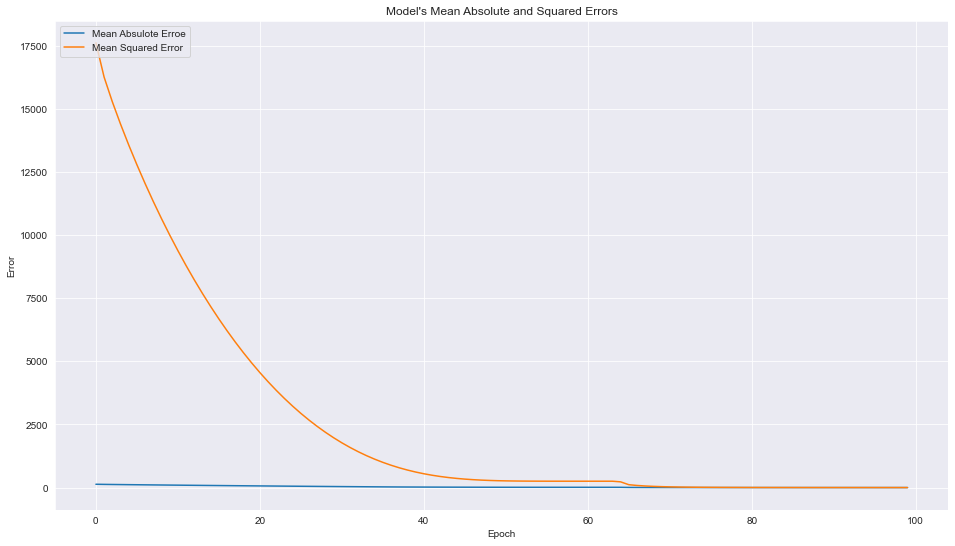

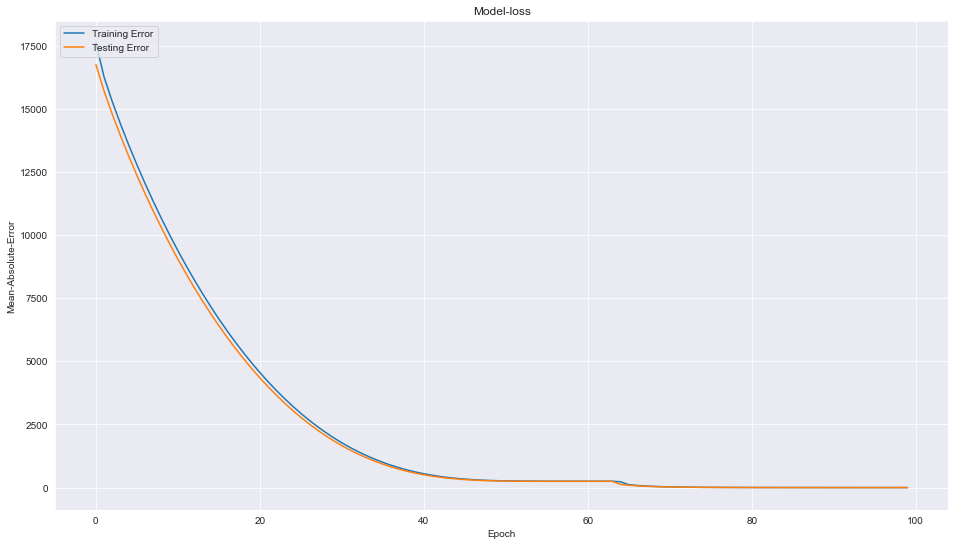

In [89]:
plt.figure(figsize=(16,9))
plt.plot(model.history.history['mae'])
plt.plot(model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(16,9))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

# Predictions of model

In [90]:
#  predictions for test data
y_predict_test = model.predict(x_test_scaled) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

94/94 [==============================] - 0s 668us/step
(3008, 9)


,CDP,GTEP,TIT,TAT,AFDP,CO,AT,Actual,Predicted
13312,12.219,25.762,1092.5,550.25,4.0023,1.26430,24.0930,134.46,134.676834
12627,10.791,20.085,1059.6,549.94,3.2106,2.69370,20.4500,111.88,112.490242
6393,12.126,25.221,1089.9,549.62,4.5325,1.96250,20.2620,133.72,134.167267
4990,12.218,25.965,1092.9,549.96,4.4266,1.57120,26.8620,133.79,134.153137
12462,10.466,19.688,1056.9,550.01,3.1241,2.29960,19.4090,110.77,110.756012
7405,10.624,19.387,1058.9,550.17,3.3709,4.27640,2.2158,113.32,114.087036
10993,12.088,25.392,1089.7,550.11,3.7871,0.83578,23.8520,133.77,133.540573
9488,11.498,23.225,1079.4,549.60,4.2837,2.01980,12.3950,128.98,128.886734
14201,13.971,32.518,1100.1,528.98,5.1559,0.87760,12.3590,159.42,161.301453
9757,13.862,32.105,1100.0,530.69,5.9309,10.75000,8.6376,161.86,161.417206


In [91]:
predictions_df.drop(['CDP','GTEP','TIT','TAT','AFDP','CO','AT'], axis =1 , inplace = True)

# APE(absolute percent error) and Error

In [92]:
# Compile the absolute percent error
APE=100*(abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual'])
print('The Accuracy for Test Data -- ANN model = ', 100-np.mean(APE))

# adding absolute percent error to table
predictions_df['APE %']=APE
predictions_df.head()

The Accuracy for Test Data -- ANN model =  99.60378692201178


,Actual,Predicted,APE %
13312,134.46,134.676834,0.161263
12627,111.88,112.490242,0.545443
6393,133.72,134.167267,0.334480
4990,133.79,134.153137,0.271423
12462,110.77,110.756012,0.012628


In [93]:
predictions_df['Error'] = (predictions_df['Actual'] - predictions_df['Predicted'])/(predictions_df['Actual'])
predictions_df.reset_index(drop = True)

,Actual,Predicted,APE %,Error
0,134.46,134.676834,0.161263,-0.001613
1,111.88,112.490242,0.545443,-0.005454
2,133.72,134.167267,0.334480,-0.003345
3,133.79,134.153137,0.271423,-0.002714
4,110.77,110.756012,0.012628,0.000126
...,...,...,...,...
3003,119.25,119.511726,0.219477,-0.002195
3004,133.74,134.185440,0.333064,-0.003331
3005,146.31,147.061081,0.513349,-0.005133
3006,150.07,150.497391,0.284794,-0.002848


# Visualizing- Actual vs Predicted Values (Model Validation)

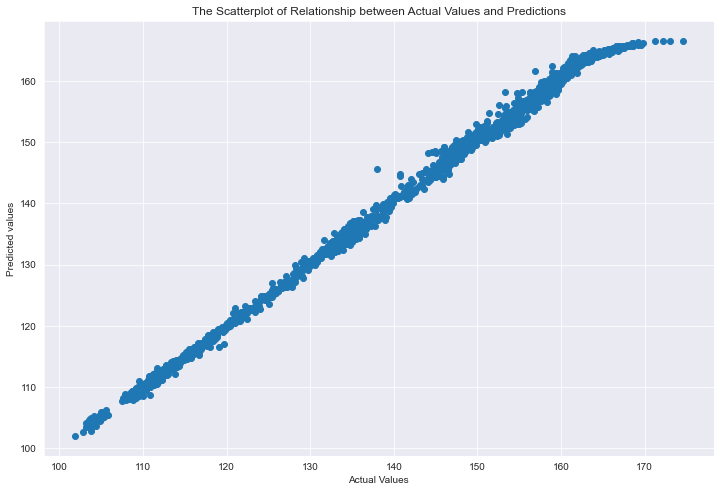

In [94]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [95]:
# calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,y_predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,y_predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_predict_test)))

MAE: 0.5477888720086282
MSE: 0.658083195997474
RMSE: 0.811223271360896


In [96]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_predict_test = model.predict(x_test_scaled)
y_predict_train = model.predict(x_train_scaled) 
print('R2_score (train): ',r2_score(y_train, y_predict_train))
print('R2_score (test): ',r2_score(y_test, y_predict_test))

376/376 [==============================] - 0s 541us/step
R2_score (train):  0.9974151638017278
R2_score (test):  0.997371763246476


In [97]:
#Evaluation of  the explained variance score (R^2)
print(' Our model predict % {} of the target'.format(np.round(metrics.explained_variance_score(y_test,y_predict_test)*100,2))) 

 Our model predict % 99.75 of the target


# Residual Analysis

<AxesSubplot:ylabel='Density'>

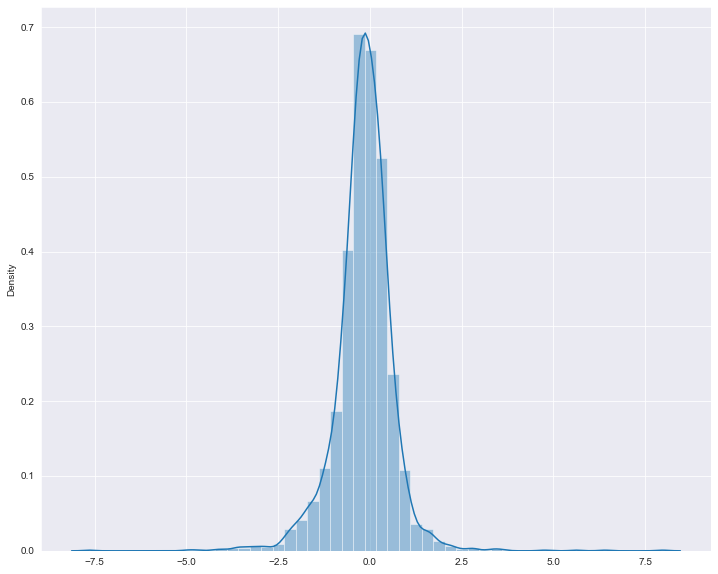

In [98]:
# visualize the differences - predictions  actual y test data
plt.figure(figsize=(12,10))
sns.distplot(y_test-y_predict_test,bins=50) #this figure also proves that our model fits very good
#There is no huge differences between our predictions and actual y data

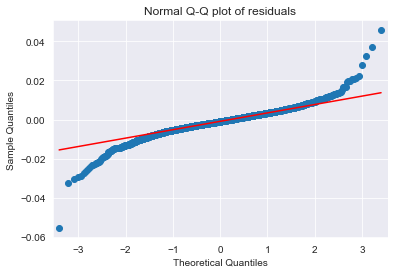

In [99]:
#Residuals values  = y - yhat
import statsmodels.api as smf
smf.qqplot(predictions_df['Error'], line = 'q')
plt.title('Normal Q-Q plot of residuals')
plt.show()

# Conclusion: 
Here we've got the highest accuracy for TEY  99.63% with 20 batch size  for 100 Epoch. We did Model evaluation using error check on test & train data & you may have seen that the abosulate percentage error is minimal on both predictior and actual dataset.

In the evaluation, we had check the residual score of imbalanced data that is,
1. MAE(Mean Absoulate Error) - 0.547
2. MSE(Mean Squared Error)- 0.658
3.RMSE(Root Mean Squared Error) - 0.811.
Which is not bad for the model for prediction.

The model is given the  good R2 score of 99.75% which shows that the model is better use for predictions.

In the end obserervation is that, the model have the normal error & it distributed independently & identically.  




